In [1]:
from fastai.vision.all import *
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
import gc

In [2]:
def random_seed(seed_value, use_cuda): 
    np.random.seed(seed_value)
 #cpu vars
    torch.manual_seed(seed_value) 
# cpu  vars
    random.seed(seed_value)
 # Python 
    if use_cuda: 
        torch.cuda.manual_seed(seed_value) 
        torch.cuda.manual_seed_all(seed_value) 
# gpu vars
        torch.backends.cudnn.deterministic = True 
 #needed
        torch.backends.cudnn.benchmark = False 
#Remember to use num_workers=0 when creating the DataBunch.

random_seed(3407,True)

In [3]:
# train_df = pd.read_csv('dataset_normal/train.csv')
# train_df['id'] = train_df['id'].apply(lambda x : "dataset_normal/images/train/" + x)
# train_df

train_df = pd.read_csv('pesudo_label4.csv')
train_df

,id,label
0,dataset_normal/images/test/5f3540c43f86dab2c9a7c87834311ee3.jpg,4
1,dataset_normal/images/test/7f14db51f1994bce42972c7fe111f5cd.jpg,18
2,dataset_normal/images/test/092908960a3d4dccbe06a60b71dcdd98.jpg,19
3,dataset_normal/images/test/542ed4f107f9472457b47a436ec55e60.jpg,5
4,dataset_normal/images/test/c125af0d467cffe584728aad4b426d53.jpg,1
...,...,...
3499,dataset_normal/images/train/ab98e8288691368429373c8ce97464bb.jpg,17
3500,dataset_normal/images/train/8554d163909096427e3197bdfe95ab5c.jpg,7
3501,dataset_normal/images/train/9c86ecf81893b65ee9ac478f1351ca8c.jpg,14
3502,dataset_normal/images/train/36398d5613e8b7e5515b37d10f7b8bd9.jpg,19


In [4]:
strat_kfold = MultilabelStratifiedKFold(n_splits=10, random_state=42, shuffle=True)
train_df['fold'] = -1
for i, (_, test_index) in enumerate(strat_kfold.split(train_df.id.values, train_df.iloc[:,1:].values)):
    train_df.iloc[test_index, -1] = i
train_df.head()

,id,label,fold
0,dataset_normal/images/test/5f3540c43f86dab2c9a7c87834311ee3.jpg,4,6
1,dataset_normal/images/test/7f14db51f1994bce42972c7fe111f5cd.jpg,18,8
2,dataset_normal/images/test/092908960a3d4dccbe06a60b71dcdd98.jpg,19,2
3,dataset_normal/images/test/542ed4f107f9472457b47a436ec55e60.jpg,5,5
4,dataset_normal/images/test/c125af0d467cffe584728aad4b426d53.jpg,1,3


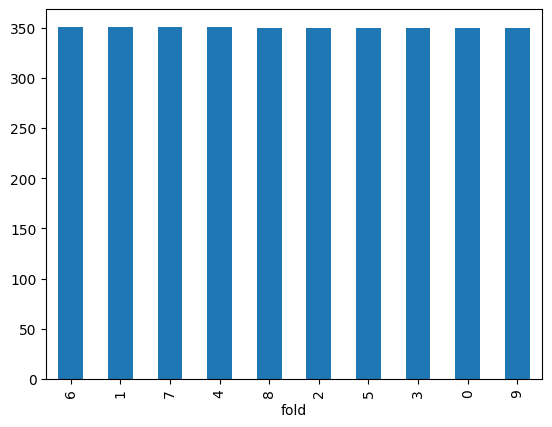

In [5]:
train_df.fold.value_counts().plot.bar();

In [6]:
class AlbumentationsTransform (RandTransform):
    split_idx,order=None,2
    def __init__(self, train_aug, valid_aug): store_attr()
    
    def before_call(self, b, split_idx):
        self.idx = split_idx
    
    def encodes(self, img: PILImage):
        if self.idx == 0:
            aug_img = self.train_aug(image=np.array(img))['image']
        else:
            aug_img = self.valid_aug(image=np.array(img))['image']
        return PILImage.create(aug_img)
    


In [7]:
import albumentations
from albumentations.pytorch import ToTensorV2
warnings.filterwarnings('ignore')
size = 448
def get_train_aug(): return albumentations.Compose([
            albumentations.Resize(always_apply=False, p=1.0, height=size, width=size, interpolation=0),
            #AutoContrast(),
            #albumentations.PadIfNeeded(always_apply=False, p=1.0, min_height=size, min_width=size, pad_height_divisor=None, pad_width_divisor=None, border_mode=0, value=(255, 255, 255), mask_value=None), #Extra tip, use size that's suitable for the efficentNetwork you are using.
            albumentations.Rotate(limit=(-20, 20)),
            #albumentations.HorizontalFlip(p=0.5),
            #albumentations.VerticalFlip(p=0.5),
            #albumentations.Sharpen(always_apply=False, p=1.0, alpha=(0.2, 0.5), lightness=(0.5, 1.0)),
            #albumentations.GaussianBlur(always_apply=False, p=1.0, blur_limit=(3, 7), sigma_limit=(0.0, 0)),
            # #albumentations.ShiftScaleRotate(always_apply=False, p=1.0, shift_limit_x=(-0.06, 0.06), shift_limit_y=(-0.06, 0.06), scale_limit=(-0.1, 0.1), rotate_limit=(-20, 20), interpolation=0, border_mode=0, value=(255, 255, 255), mask_value=None, rotate_method='largest_box'),
            # albumentations.HueSaturationValue(
            #     hue_shift_limit=0.2, 
            #     sat_shift_limit=0.2, 
            #     val_shift_limit=0.2, 
            #     p=0.5
            # ),
            # #albumentations.ColorJitter(contrast=(0.9, 1.1)),
            # #albumentations.CLAHE(always_apply=False, p=0.5, clip_limit=(1, 4), tile_grid_size=(8, 8)),
            # albumentations.RandomBrightnessContrast(
            #     brightness_limit=(-0.2,0.2), 
            #     contrast_limit=(-0.2, 0.2), 
            #     p=0.5
            # ),
            #albumentations.RandomGamma(),
            #albumentations.ToGray(always_apply=False, p=1.0)
            
           #albumentations.RandomGridShuffle(p=0.5)\
    ], p=1.)



def get_valid_aug(): return albumentations.Compose([
            albumentations.Resize(always_apply=False, p=1.0, height=size, width=size, interpolation=0),
  
            #albumentations.PadIfNeeded(always_apply=False, p=1.0, min_height=size, min_width=size, pad_height_divisor=None, pad_width_divisor=None, border_mode=0, value=(255, 255, 255), mask_value=None),
            #albumentations.ToGray(always_apply=False, p=1.0),
            #AutoContrast(),
             
            ], p=1.0)

item_tfms = AlbumentationsTransform(get_train_aug(), get_valid_aug())
batch_tfms = [Normalize.from_stats(*imagenet_stats)]

In [8]:
def get_data(fold=0):
    return DataBlock(blocks=(ImageBlock,CategoryBlock),
                       get_x=ColReader(0),
                       get_y=ColReader(1),
                       splitter=IndexSplitter(train_df[train_df.fold == fold].index),
                       item_tfms=item_tfms,
                   batch_tfms=[Normalize.from_stats(*imagenet_stats)]
                      ).dataloaders(train_df, bs=6)

In [9]:
test_df = pd.read_csv('dataset_normal/test.csv')
test_df['id'] = test_df['id'].apply(lambda x : "dataset_normal/images/test/" + x)
tstpng = test_df.copy()
tstpng.head()

,id
0,dataset_normal/images/test/5f3540c43f86dab2c9a7c87834311ee3.jpg
1,dataset_normal/images/test/7f14db51f1994bce42972c7fe111f5cd.jpg
2,dataset_normal/images/test/092908960a3d4dccbe06a60b71dcdd98.jpg
3,dataset_normal/images/test/542ed4f107f9472457b47a436ec55e60.jpg
4,dataset_normal/images/test/c125af0d467cffe584728aad4b426d53.jpg


In [ ]:
all_preds = []
#cutmix = CutMix(1.)
mixup = MixUp(1.)
for i in range(10):
    dls = get_data(i)
    
    learn = cnn_learner(dls, 'eva02_large_patch14_448.mim_m38m_ft_in22k_in1k',metrics=accuracy,cbs= [SaveModelCallback(monitor='valid_loss'),
                                                                                                                mixup]).to_fp16()
    #learn.fit_one_cycle(10, slice(1e-5,1e-4))
    learn.fine_tune(5)
#     learn.fit_one_cycle(10, cbs=EarlyStoppingCallback(monitor='valid_loss'))
#     learn.dls = get_data(i,512,32)
#     learn.fine_tune(10,cbs=EarlyStoppingCallback(monitor='valid_loss'))
    
    
    tst_dl = learn.dls.test_dl(tstpng)
    preds, _ = learn.get_preds(dl=tst_dl)
    all_preds.append(preds)
    del learn
    torch.cuda.empty_cache()
    gc.collect()

epoch,train_loss,valid_loss,accuracy,time
0,2.464059,0.737741,0.742857,03:14


Better model found at epoch 0 with valid_loss value: 0.7377413511276245.


epoch,train_loss,valid_loss,accuracy,time
0,1.717754,0.169721,0.954286,04:14
1,1.429817,0.106335,0.974286,04:14
2,1.175348,0.076330,0.982857,04:14
3,0.998154,0.041559,0.994286,04:14


Better model found at epoch 0 with valid_loss value: 0.16972051560878754.
Better model found at epoch 1 with valid_loss value: 0.10633503645658493.
Better model found at epoch 2 with valid_loss value: 0.07633049041032791.
Better model found at epoch 3 with valid_loss value: 0.0415588803589344.


In [ ]:
sub = pd.read_csv('dataset_normal/test.csv')
preds = np.mean(np.stack(all_preds), axis=0)
preds = torch.from_numpy(preds)

In [ ]:
#tta_preds, _ = tta
idxs = preds.argmax(dim=1)
vocab = np.array(dls.vocab)
sub = pd.read_csv('dataset_normal/test.csv')
sub['predict'] = vocab[idxs]


In [ ]:
sub.to_csv("pesudo_hope.csv",index=False)

In [ ]:
sub